OUTLIER:- data point in the data set that is distant from other points
outside 1.5 times the interquartile range above third quartile and below first quartile 

it represents a variability in data or an experimental measurement error

it causes impact on mean and standard deviation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [10]:
np.random.seed(69)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([5,1,147,157])
data=np.concatenate([data,outliers])
df=pd.DataFrame(data,columns=['Values'])``
df

,Values
0,59.155071
1,43.964580
2,61.622952
3,43.985999
4,34.025143
...,...
99,47.122029
100,5.000000
101,1.000000
102,147.000000


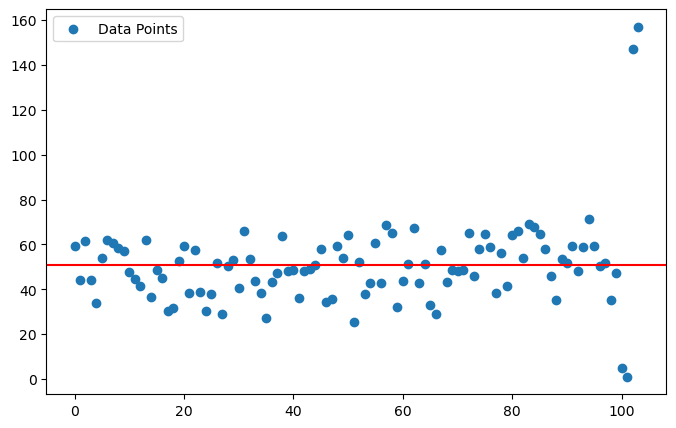

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],label="Data Points")
plt.axhline(y=df['Values'].mean(),color='red')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Box Plot for Outlier')

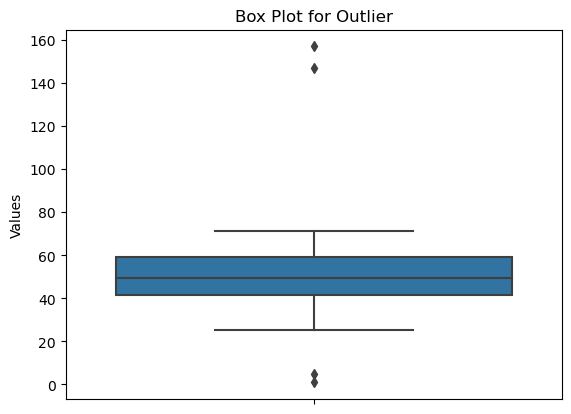

In [12]:

sns.boxplot(data=df,y='Values')
plt.title("Box Plot for Outlier")

In [20]:
df['Z-Score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-Score'].apply(lambda x: 'Outlier' if abs(x)>3 else "Normal")
print(df[df['Outlier_Z'] == 'Outlier'])
# df=df.drop(columns='Outier_Z')
df

     Values   Z-Score Outlier_Z
102   147.0  5.063639   Outlier
103   157.0  5.589391   Outlier


,Values,Z-Score,Outlier_Z
0,59.155071,0.445174,Normal
1,43.964580,-0.353469,Normal
2,61.622952,0.574923,Normal
3,43.985999,-0.352343,Normal
4,34.025143,-0.876037,Normal
...,...,...,...
99,47.122029,-0.187466,Normal
100,5.000000,-2.402040,Normal
101,1.000000,-2.612341,Normal
102,147.000000,5.063639,Outlier


In [21]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

df['Outlier_IQR']=df["Values"].apply(lambda x: 'Outlier' if(x<lower_bound or x>upper_bound) else "Normal")
print(df[df['Outlier_IQR'] == 'Outlier'])

     Values   Z-Score Outlier_Z Outlier_IQR
100     5.0 -2.402040    Normal     Outlier
101     1.0 -2.612341    Normal     Outlier
102   147.0  5.063639   Outlier     Outlier
103   157.0  5.589391   Outlier     Outlier


Scatter Plot : Outliers are far fro the main cluster
box plot : 

In [23]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])
Q1=np.percentile(data,25)
Q2=np.median(data)
Q3=np.percentile(data,75)
min_value = np.min(data)
max_value = np.max(data)
IQR=Q3-Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
outliers=data[(data < lower_bound) | (data > upper_bound)]

print(f"5 NUmber Summary:\nMin: {min_value},Q1:{Q1},Median (Q2): {Q2}, Q3: {Q3}, Max:{max_value}")
print(IQR)
print(f"Lower Bound:{lower_bound}, Upper Bound: {upper_bound}")
outliers

5 NUmber Summary:
Min: 5.0,Q1:43.874401021766715,Median (Q2): 48.73043708220287, Q3: 55.00852473036764, Max:120.0
11.134123708600924
Lower Bound:27.17321545886533, Upper Bound: 71.70971029326903


array([ 23.80254896,  10.        , 110.        ,   5.        ,
       120.        ])